In [65]:
import numpy as np

from implementations import *
from proj1_helpers import *

In [66]:
# Load data
DATA_TRAIN_PATH = 'train.csv' 
y, tX, ids, headers = load_csv_data(DATA_TRAIN_PATH) # Modified the load_csv_data to also give headers

In [67]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [68]:
def cv_model_baseline(tX, headers, y, degree, tX_test, y_test, headers_test):
    # process features for to train the model
    data_tr, targets_tr, ids_tr = process_features_train(tX, headers, y, degree)
    w_init = np.zeros((data_tr[0].shape[1], 1))
    
    # train base model
    
    w,_ = logistic_regression_mod(targets_tr[0], data_tr[0], w_init, max_iters=100, gamma=0.01)

    # calculate the loss
    data_te, targets_te, ids_te = process_features_train(tX_test, headers_test, y_test, degree)
    loss = calculate_loss_lr(targets_te[0], data_te[0], w)
    
    
    return loss[0]

In [69]:
def cross_validation_baseline(y, x, ids, degrees):
    seed = 1
    k_fold = 4
    
    
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    loss = np.zeros((degrees, k_fold))
    
    
    for degree in np.arange(degrees)+1:
        loss_d = []
        for k in range(k_fold):
            #****************************************************
            # Form train and test sets
            x_tr = x[k_indices[np.arange(len(k_indices))!=k].ravel()]
            x_te = x[k_indices[k]]

            y_tr = y[k_indices[np.arange(len(k_indices))!=k].ravel()]
            y_te = y[k_indices[k]]

            ids_tr = ids[k_indices[np.arange(len(k_indices))!=k].ravel()]
            ids_te = ids[k_indices[k]]

            print("Fold number: {f}, polynomial degree: {d}".format(f=k+1, d=degree))

            #****************************************************

            lo = cv_model_baseline(x_tr, headers, y_tr, degree, x_te, y_te, headers)
            
            loss_d.append(lo)
            
        loss[degree-1] = np.array(loss_d)
        
    return loss/(len(y)/degrees)

In [70]:
degrees = 5
loss = cross_validation_baseline(y, tX, ids, degrees)

Fold number: 1, polynomial degree: 1
Fold number: 2, polynomial degree: 1
Fold number: 3, polynomial degree: 1
Fold number: 4, polynomial degree: 1
Fold number: 1, polynomial degree: 2
Fold number: 2, polynomial degree: 2
Fold number: 3, polynomial degree: 2
Fold number: 4, polynomial degree: 2
Fold number: 1, polynomial degree: 3
Fold number: 2, polynomial degree: 3
Fold number: 3, polynomial degree: 3
Fold number: 4, polynomial degree: 3
Fold number: 1, polynomial degree: 4
Fold number: 2, polynomial degree: 4
Fold number: 3, polynomial degree: 4
Fold number: 4, polynomial degree: 4
Fold number: 1, polynomial degree: 5
Fold number: 2, polynomial degree: 5
Fold number: 3, polynomial degree: 5
Fold number: 4, polynomial degree: 5


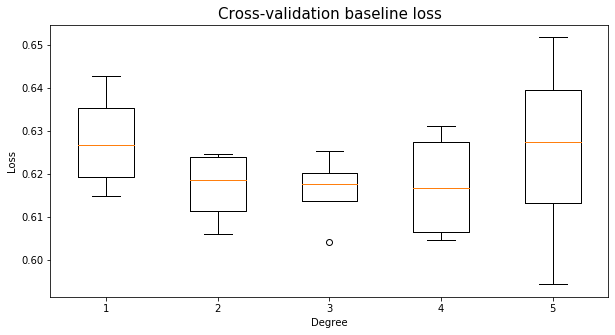

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
ax = plt.boxplot(loss.T)
plt.xlabel("Degree")
plt.ylabel("Loss")
plt.title("Cross-validation baseline loss", fontsize=15)
plt.savefig("cross_validation_bl_loss");

In [80]:
np.savetxt("cv_bl_loss.csv", loss, delimiter=",")